# Predicting Shared Bike Usage

#### Description:

This codebook covers a complete workflow for how to predict shared bike usage.

#### Skill level:

- Intermediate

### Import the required libraries
-------------------------

In [1]:
import os
import sys

platform_path = os.path.abspath(os.path.join(os.path.abspath(''), '../../'))
sys.path.append(platform_path)

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import HELPERS.data_preprocessing.data_encoder as de

-------------------------
### Read data into a dataframe

In [3]:
df_raw = pd.read_csv(os.path.join(platform_path, 'DATA/hour.csv'))

-------------------------
### Check shape and head of the dataframe

In [4]:
df_raw.shape

(17379, 17)

In [5]:
df_raw.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


-------------------------
### Check data types for each column

In [6]:
df_raw.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Check common statistics for numeric columns
-------------------------

In [7]:
df_raw.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Rename and typecast each column
-------------------------

In [8]:
df = df_raw

df.rename(columns={
        'instant':'rec_id',
        'dteday':'datetime',
        'holiday':'is_holiday',
        'workingday':'is_workingday',
        'weathersit':'weather_condition',
        'hum':'humidity',
        'mnth':'month',
        'cnt':'total_count',
        'hr':'hour',
        'yr':'year'
    }, inplace=True)

In [9]:
df['datetime'] = pd.to_datetime(df.datetime)

df['season'] = df.season.astype('category')
df['is_holiday'] = df.is_holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weather_condition'] = df.weather_condition.astype('category')
df['is_workingday'] = df.is_workingday.astype('category')
df['month'] = df.month.astype('category')
df['year'] = df.year.astype('category')
df['hour'] = df.hour.astype('category')

### Plot hourly bike usage, over a 24 hour period, for each season
-------------------------

[Text(0.5, 1.0, 'Hourly bike usage for each season')]

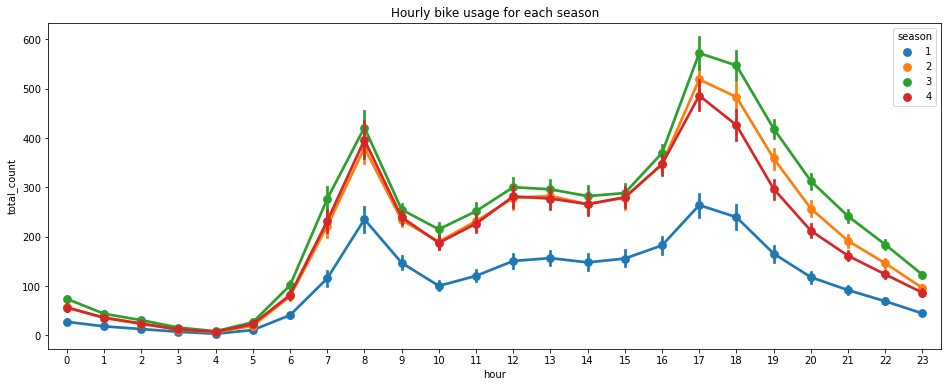

In [10]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.pointplot(data=df[['hour', 'total_count', 'season']],
              x='hour', y='total_count', hue='season', ax=ax)

ax.set(title='Hourly bike usage for each season')

### Plot hourly bike usage, over a 24 hour period, for each day of week
-------------------------

[Text(0.5, 1.0, 'Hourly bike usage for each day of week')]

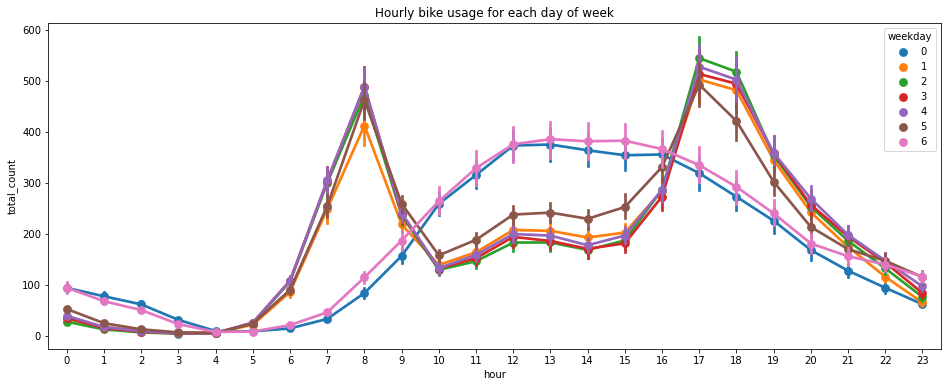

In [11]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.pointplot(data=df[['hour', 'total_count', 'weekday']],
              x='hour', y='total_count', hue='weekday', ax=ax)

ax.set(title='Hourly bike usage for each day of week')

### Plot hourly distributions of bike usage, over a 24 hour period
-------------------------

[Text(0.5, 1.0, 'Hourly distributions of bike useage')]

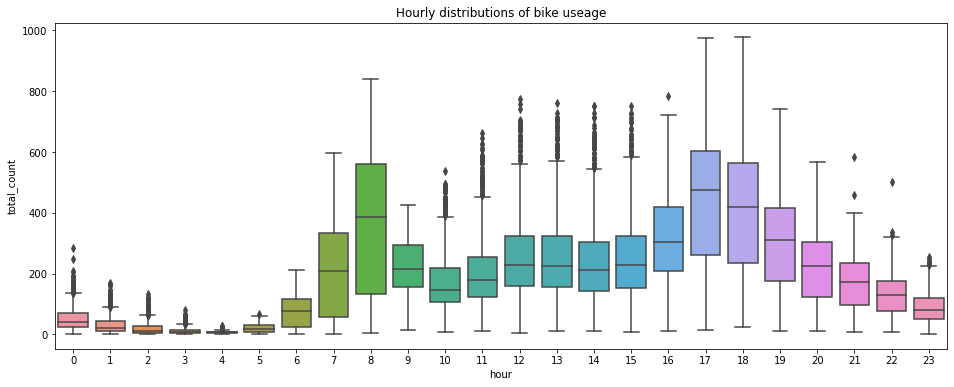

In [12]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.boxplot(data=df[['hour', 'total_count']], 
            x='hour', y='total_count', ax=ax)

ax.set(title='Hourly distributions of bike useage')

### Plot monthly distributions of bike usage, over a 12 month period
-------------------------

[Text(0.5, 1.0, 'Monthly distributions of bike useage')]

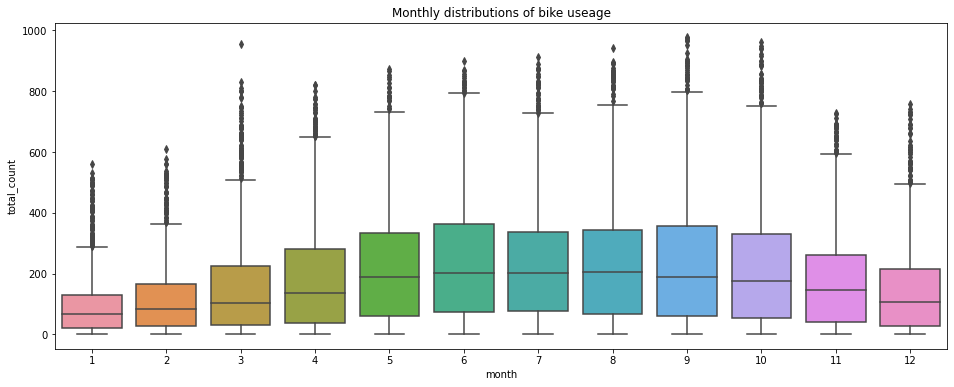

In [13]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.boxplot(data=df[['month', 'total_count']], 
            x='month', y='total_count', ax=ax)

ax.set(title='Monthly distributions of bike useage')

### Check heatmap of correlations between variables
-------------------------

<AxesSubplot:>

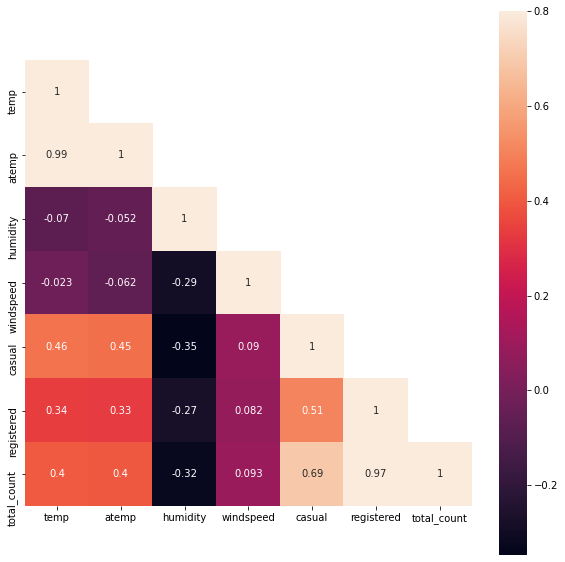

In [14]:
corrMatt = df[['temp', 'atemp', 'humidity', 'windspeed',
               'casual', 'registered', 'total_count']].corr()

fig, ax = plt.subplots(figsize=(10, 10)) 

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

sns.heatmap(corrMatt, mask=mask,
            vmax=.8, square=True, annot=True)

### Check each dataframe column for missing values
-------------------------

In [15]:
for col in df.columns:
    print(col + ':', df[col].isnull().values.sum())

rec_id: 0
datetime: 0
season: 0
year: 0
month: 0
hour: 0
is_holiday: 0
weekday: 0
is_workingday: 0
weather_condition: 0
temp: 0
atemp: 0
humidity: 0
windspeed: 0
casual: 0
registered: 0
total_count: 0


-------------------------
### Separate features from the label

In [16]:
X_all = df.drop('total_count', axis=1)

In [17]:
y_true_all = df_raw[['total_count']].values

-------------------------
### Make a split between training and test sets of data

In [18]:
X_train, X_test, y_true_train, y_true_test = train_test_split(X_all, y_true_all, test_size=0.3, random_state=42)

X_train = X_train.reset_index()
X_test = X_test.reset_index()

-------------------------
### Encode categorical columns for training and test data

In [19]:
cat_cols = [
    'season',
    'is_holiday',
    'weather_condition',
    'is_workingday',
    'hour',
    'weekday',
    'month',
    'year'
]

numeric_cols = [
    'temp', 
    'humidity', 
    'windspeed',
]

In [20]:
X_train.columns

Index(['index', 'rec_id', 'datetime', 'season', 'year', 'month', 'hour',
       'is_holiday', 'weekday', 'is_workingday', 'weather_condition', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

In [21]:
encoded_cols = []

for col in cat_cols:
    transformed_obj = de.fit_transform_ohe(X_train, col)
    
    encoded_cols.append({
        'col_name': col,
        'label_enc': transformed_obj[0],
        'ohe_enc': transformed_obj[1],
        'df_feature': transformed_obj[2]
    })

In [22]:
X_train_extended = [X_train[numeric_cols]]

X_train_extended.extend([enc['df_feature'] for enc in encoded_cols if enc['col_name'] in cat_cols])

X_train_extended = pd.concat(X_train_extended, axis=1)

In [23]:
X_train_extended.columns

Index(['temp', 'humidity', 'windspeed', 'season_1', 'season_2', 'season_3',
       'season_4', 'is_holiday_0', 'is_holiday_1', 'weather_condition_1',
       'weather_condition_2', 'weather_condition_3', 'weather_condition_4',
       'is_workingday_0', 'is_workingday_1', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'year_0',
       'year_1'],
      dtype='object')

In [24]:
encoded_cols = []

for col in cat_cols:
    transformed_obj = de.fit_transform_ohe(X_test, col)
    
    encoded_cols.append({
        'col_name': col,
        'label_enc': transformed_obj[0],
        'ohe_enc': transformed_obj[1],
        'df_feature': transformed_obj[2]
    })

In [25]:
X_test_extended = [X_test[numeric_cols]]

X_test_extended.extend([enc['df_feature'] for enc in encoded_cols if enc['col_name'] in cat_cols])

X_test_extended = pd.concat(X_test_extended, axis=1)

-------------------------
### Check feature importance using a decision tree regressor

In [26]:
clf = DecisionTreeRegressor()

clf.fit(X_train_extended, y_true_train)

DecisionTreeRegressor()

In [27]:
clf.feature_importances_

array([1.53258224e-01, 1.44124982e-01, 1.18670889e-02, 7.78840638e-03,
       2.89315125e-03, 1.26142312e-03, 1.39849173e-02, 6.31623591e-04,
       4.70611986e-04, 1.96938150e-03, 1.24190466e-03, 1.26911209e-02,
       5.13784448e-05, 4.56431863e-02, 4.27188217e-02, 1.16256019e-02,
       1.28051169e-02, 1.29535178e-02, 9.41349638e-03, 1.14358103e-02,
       9.51172407e-03, 5.41530834e-03, 1.64375640e-02, 6.87665150e-02,
       1.47498655e-02, 5.97605206e-03, 4.70091216e-03, 4.61055111e-03,
       5.87849537e-03, 3.64858205e-03, 3.51894595e-03, 2.02724840e-02,
       8.72659642e-02, 6.77544911e-02, 2.89018040e-02, 1.76431309e-02,
       5.56674855e-03, 5.86195186e-03, 8.38424870e-03, 2.00788394e-03,
       2.20019755e-03, 1.71867499e-03, 2.07658339e-03, 1.65812039e-03,
       5.18200074e-03, 3.75636470e-03, 4.67936532e-04, 5.35963937e-04,
       1.20534305e-03, 2.44916858e-03, 9.60484447e-04, 8.17800557e-04,
       1.82769874e-03, 7.00189610e-04, 2.00899906e-03, 2.49302659e-03,
      

<BarContainer object of 60 artists>

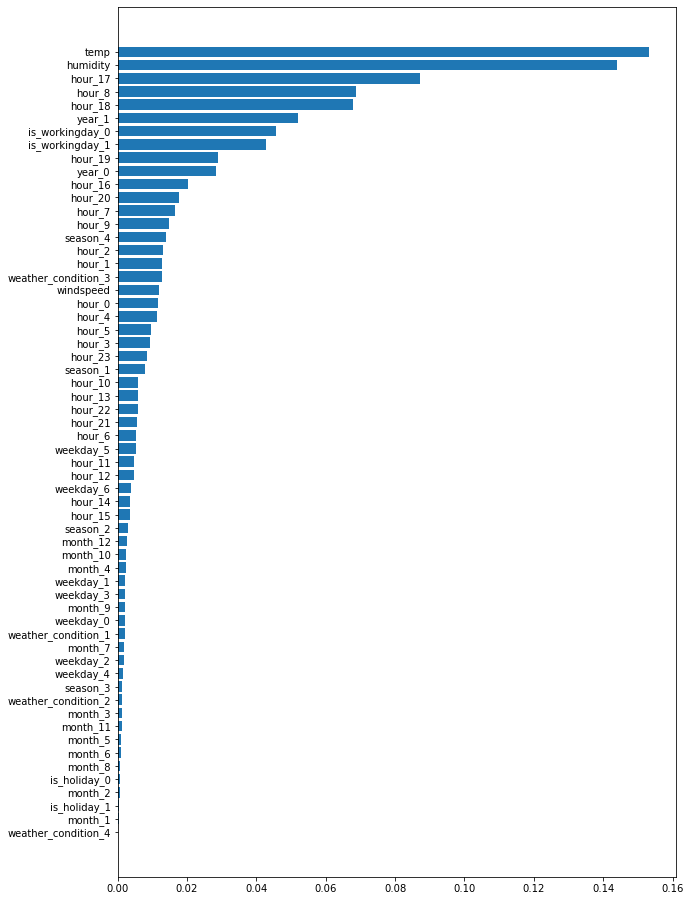

In [28]:
fig, ax = plt.subplots(figsize=(10, 16)) 

sorted_idx = clf.feature_importances_.argsort()
plt.barh(X_train_extended.columns[sorted_idx], clf.feature_importances_[sorted_idx])

-------------------------
### Fit a decision tree regressor

In [29]:
clf = DecisionTreeRegressor(max_depth=4,
                            min_samples_split=5,
                            max_leaf_nodes=10)

clf.fit(X_train_extended, y_true_train)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10, min_samples_split=5)

In [30]:
y_pred_test = clf.predict(X_test_extended)

residuals = y_true_test.flatten() - y_pred_test

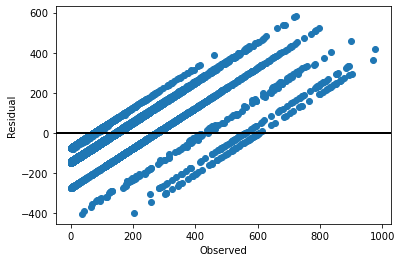

In [31]:
fig, ax = plt.subplots()

ax.scatter(y_true_test.flatten(), residuals)
ax.axhline(lw=2, color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()